**`Run the following cell to install lyricsgenius:`**

In [6]:
#!pip install lyricsgenius

**`Import Packages:`**

In [3]:
import boto3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Spotify_Analysis import *
import transformers as hf
from torch.utils.data import Dataset, DataLoader

%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore")

# `Calculating Similarity between Ay-Yo! User Profiles`
`Marti Heit and Emma Rainer`

## Task 1: Data Generation

### Load Glove Embeddings

### Genius API
Leverage genius API to scrape relevant song lyrics. Using glove embeddings, find a word vector centroid for the text of a particular song.

In [35]:
genius = Genius(GENIUS_API_TOKEN) # Token stored in Spotify_Analysis.py

## Profile Similarity of Ay-Yo users

### Pull Users and Posts from Ay-Yo!

In [4]:
with open('aws_access_key.txt', 'r') as f:
     AWS_ACCESS_KEY = f.read().split('\n')[0]
with open('aws_secret_access_key.txt', 'r') as f:
     AWS_SECRET_ACCESS_KEY = f.read().split('\n')[0]

users_to_posts = get_users_to_posts(AWS_ACCESS_KEY, AWS_SECRET_ACCESS_KEY)

In [5]:
users_to_lyrics = get_users_to_lyrics(users_to_posts, GENIUS_API_TOKEN)

Searching for "Forever After All" by Luke Combs...
Done.
Searching for "Being In Love" by Wet Leg...
Done.
Searching for "Last Caress - C.I. Recording 1978" by Misfits...
No results found for: 'Last Caress - C.I. Recording 1978 Misfits'
Searching for "Ribs" by Lorde...
Done.
Searching for "blue" by keshi...
Done.
Searching for "I Gotta Feeling" by Black Eyed Peas...
Done.
Searching for "I Love You." by Kaivon...
Done.
Searching for "Violent Crimes" by Kanye West...
Done.
Searching for "Do It To It" by ACRAZE...
Done.
Searching for "Set Me Free (feat. MAX)" by Oliver Heldens...
Done.
Searching for "less of you" by keshi...
Done.
Searching for "Down with the Sickness" by Disturbed...
Done.
Searching for "she likes spring, I prefer winter" by slchld...
Done.
Searching for "Ghost" by Justin Bieber...
Done.
Searching for "Places We Don't Know" by Kasbo...
Specified song does not contain lyrics. Rejecting.
Searching for "September" by Earth, Wind & Fire...
Searching for "September" by Earth,

In [6]:
class AyyoDataset(Dataset):
    def __init__(self, users_to_lyrics, word_embedding, tokenizer):
        self.users_to_lyrics = users_to_lyrics
        self.word_emb = word_embedding
        self.tokenizer = tokenizer
        
    def __len__(self):
        return len(self.users_to_lyrics)
    
    def __getitem__(self, idx):
        if isinstance(idx, int):
            key = list(self.users_to_lyrics.keys())[idx]
        else:
            key = idx
        lyrics_list = self.users_to_lyrics[key]
        centroid = compute_centroid(lyrics_list, self.word_emb, self.tokenizer)
        return key, centroid

In [7]:
user2idx = {u:i for i, u in enumerate(list(users_to_lyrics.keys()))}

#### Using Pretrained GloVe Embeddings with Custom Tokenization

In [7]:
glove = load_glove('glove.6B.300d.txt')  # dictionary

KeyboardInterrupt: 

In [6]:
dataset = AyyoDataset(users_to_lyrics, glove, tokenizer=None)
dataloader = DataLoader(dataset)

NameError: name 'glove' is not defined

In [36]:
user1, centroid1 = dataset[12]
user2, centroid2 = dataset[15]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between emmamnrainer and marti.heit is 0.3409045338630676


In [41]:
user1, centroid1 = dataset[user2idx['trenthamner']]
user2, centroid2 = dataset[user2idx['marti.heit']]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between trenthamner and marti.heit is 0.7031075954437256


In [42]:
user1, centroid1 = dataset[user2idx['mateen_saifyan']]
user2, centroid2 = dataset[user2idx['marti.heit']]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between mateen_saifyan and marti.heit is 0.31349149346351624


In [43]:
user1, centroid1 = dataset[user2idx['mateen_saifyan']]
user2, centroid2 = dataset[user2idx['emmamnrainer']]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between mateen_saifyan and emmamnrainer is 0.43250492215156555


#### Using Pretrained GloVe Embeddings with Pretrained Autotokenizer 

In [10]:
tokenizer = hf.AutoTokenizer.from_pretrained('bert-base-uncased')

In [46]:
dataset = AyyoDataset(users_to_lyrics, glove, tokenizer=tokenizer)
dataloader = DataLoader(dataset)

NameError: name 'glove' is not defined

In [16]:
user1, centroid1 = dataset[12]
user2, centroid2 = dataset[15]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between emmamnrainer and marti.heit is 0.2059921771287918


In [20]:
user1, centroid1 = dataset[user2idx['trenthamner']]
user2, centroid2 = dataset[user2idx['marti.heit']]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between trenthamner and marti.heit is 0.4512885510921478


In [21]:
user1, centroid1 = dataset[user2idx['mateen_saifyan']]
user2, centroid2 = dataset[user2idx['marti.heit']]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between mateen_saifyan and marti.heit is 0.1853409856557846


In [22]:
user1, centroid1 = dataset[user2idx['mateen_saifyan']]
user2, centroid2 = dataset[user2idx['emmamnrainer']]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between mateen_saifyan and emmamnrainer is 0.23521049320697784


#### Using Wikipedia GloVe Embeddings with Pretrained Autotokenizer

In [7]:
import gensim.downloader
glove_emb = gensim.downloader.load('glove-wiki-gigaword-100')

In [10]:
dataset = AyyoDataset(users_to_lyrics, glove_emb, tokenizer=tokenizer)
dataloader = DataLoader(dataset)

In [11]:
user1, centroid1 = dataset[12]
user2, centroid2 = dataset[15]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Token indices sequence length is longer than the specified maximum sequence length for this model (842 > 512). Running this sequence through the model will result in indexing errors


Similarity score between emmamnrainer and marti.heit is 0.21748033165931702


In [12]:
user1, centroid1 = dataset[user2idx['trenthamner']]
user2, centroid2 = dataset[user2idx['marti.heit']]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between trenthamner and marti.heit is 0.4655885696411133


In [13]:
user1, centroid1 = dataset[user2idx['mateen_saifyan']]
user2, centroid2 = dataset[user2idx['marti.heit']]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between mateen_saifyan and marti.heit is 0.19340956211090088


In [14]:
user1, centroid1 = dataset[user2idx['mateen_saifyan']]
user2, centroid2 = dataset[user2idx['emmamnrainer']]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between mateen_saifyan and emmamnrainer is 0.25985467433929443


#### Using Twitter GloVe Embeddings with Pretrained Autotokenizer

In [8]:
import gensim.downloader
glove_emb = gensim.downloader.load('glove-twitter-200')

In [11]:
dataset = AyyoDataset(users_to_lyrics, glove_emb, tokenizer=tokenizer)
dataloader = DataLoader(dataset)

In [12]:
user1, centroid1 = dataset[12]
user2, centroid2 = dataset[15]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Token indices sequence length is longer than the specified maximum sequence length for this model (842 > 512). Running this sequence through the model will result in indexing errors


Similarity score between emmamnrainer and marti.heit is 0.21748033165931702


In [13]:
user1, centroid1 = dataset[user2idx['trenthamner']]
user2, centroid2 = dataset[user2idx['marti.heit']]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between trenthamner and marti.heit is 0.4655885696411133


In [14]:
user1, centroid1 = dataset[user2idx['mateen_saifyan']]
user2, centroid2 = dataset[user2idx['marti.heit']]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between mateen_saifyan and marti.heit is 0.19340956211090088


In [15]:
user1, centroid1 = dataset[user2idx['mateen_saifyan']]
user2, centroid2 = dataset[user2idx['emmamnrainer']]
print(f"Similarity score between {user1} and {user2} is {similarity_score(centroid1, centroid2)}")

Similarity score between mateen_saifyan and emmamnrainer is 0.25985467433929443


### Find Most Similar Users

In [16]:
user_similarity_matrix = create_user_similarity_matrix(users_to_lyrics, dataset)

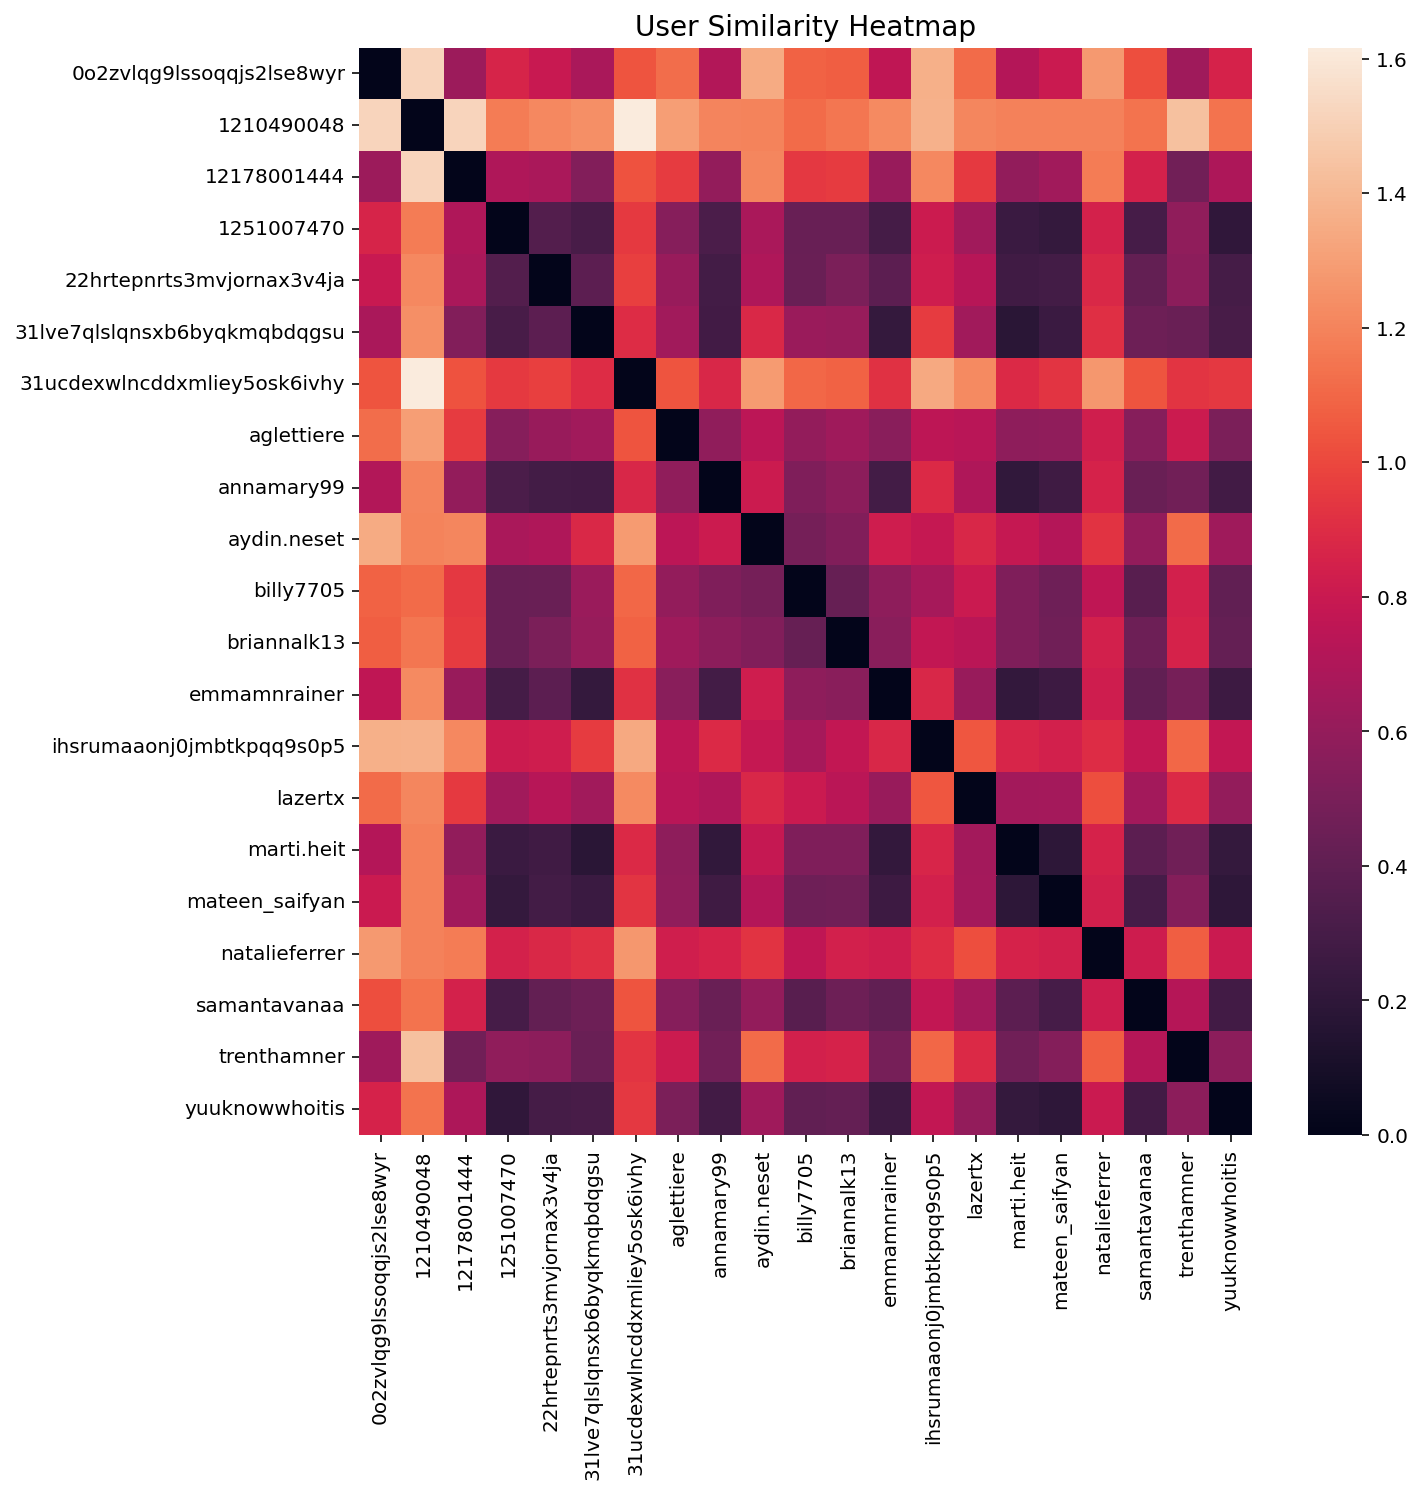

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(user_similarity_matrix.astype('float64'))
ax.set_title('User Similarity Heatmap', size=14)
fig.show()
plt.savefig('user_heatmap.png')

## Task 2: Use generated data to predict if a user will like a song

#### Generate Dataframe

So im thinking we generate data like:

features:
- unique user centroid
- new song
- 1/0 rating

In [123]:
data = {'user_embedding': [user1_centroid, user1_centroid, user1_centroid, user2_centroid, user2_centroid,\
                      user2_centroid, user3_centroid, user3_centroid,user3_centroid],
        'most_similar_user': [user2_centroid,user2_centroid,user2_centroid,user1_centroid,user1_centroid,\
                         user1_centroid, user2_centroid, user2_centroid, user2_centroid],
        'new_song': [lana_lyrics, olivia_lyrics, kendrick_lyrics, fiona_lyrics, zach_lyrics, chappell_lyrics,\
                 amine_lyrics, kanye_lyrics, mac_lyrics]}

In [125]:
df = pd.DataFrame.from_dict(data)
df['new_song'] = [doc2vec(lyrics, glove) for lyrics in df['new_song']]
df['label'] = 1
df.head()

,user_embedding,most_similar_user,new_song,label
0,"[-0.04867624, -0.046041112, -0.08815306, 0.067...","[-0.0867781, -0.042138185, -0.1209145, 0.00358...","[-0.033662993, -0.056129795, -0.08538399, -0.0...",1
1,"[-0.04867624, -0.046041112, -0.08815306, 0.067...","[-0.0867781, -0.042138185, -0.1209145, 0.00358...","[-0.12806848, -0.040105637, -0.11151454, 0.018...",1
2,"[-0.04867624, -0.046041112, -0.08815306, 0.067...","[-0.0867781, -0.042138185, -0.1209145, 0.00358...","[0.015702737, -0.04188791, -0.06756065, 0.1926...",1
3,"[-0.0867781, -0.042138185, -0.1209145, 0.00358...","[-0.04867624, -0.046041112, -0.08815306, 0.067...","[-0.116803765, -0.035361692, -0.118647344, 0.0...",1
4,"[-0.0867781, -0.042138185, -0.1209145, 0.00358...","[-0.04867624, -0.046041112, -0.08815306, 0.067...","[-0.02747917, -0.10858934, -0.068350054, 0.007...",1


#### Negative Sampling

I'm thinking that once we have a lot of sample users, we can take the user that is most dissimilar from a given user and give all of those songs a negative rating? idk 

#### Modeling

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [129]:
# Using pretrained embeddings initially? idk need to work on this

class MF(nn.Module):
    def __init__(self, num_users, num_items, emb_size=300):
        super(MF, self).__init__()
        self.n_u = num_users
        self.n_v = num_items
        
        self.user_emb = nn.Embedding(num_users, emb_size)
        self.user_bias = nn.Embedding(num_users, 1)
        
        self.item_emb = nn.Embedding(num_items, emb_size) 
        self.item_bias = nn.Embedding(num_items, 1)
        
        self.user_emb.weight.data.uniform_(0,0.05)   # range
        self.item_emb.weight.data.uniform_(0,0.05)
        
        self.user_bias.weight.data.uniform_(-0.01,0.01) # range
        self.item_bias.weight.data.uniform_(-0.01,0.01)

    def forward(self, u, v):
        b = self.user_bias(u).squeeze()
        c = self.item_bias(v).squeeze()
        U = self.user_emb(u)
        V = self.item_emb(v)
        uv = (U*V).sum(1) + b + c
        return uv